# Pymaceuticals Inc.
---

### Analysis/Observations

There is a positive relationship, as shown by the linear regression created below between weight and average tumor volume for the Capomulin regimen
There is a negative relationship, as shown by the line plot below between timepoint and tumor volume of a mouse treated with Capomulin
The Infubinol and Ceftamin drug regimens were higher than the Capolmulin and Ramicane drug regimens in terms of tumor volume
There is a slighter higher percentage of male mice compared to female mice as shown by the pie charts.

In [7]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
mouse_study_results = pd.merge(mouse_metadata, study_results, how="outer", on="Mouse ID")

# Display the data table for preview
mouse_study_results.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice.
mice_count = len(mouse_metadata)
mice_count

249

In [4]:
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
df = mouse_study_results
dup_mice = df.duplicated(["Mouse ID", "Timepoint"], keep=False)
dup_mice_ID = df.loc[dup_mice, "Mouse ID"].unique()
dup_mice_ID

array(['g989'], dtype=object)

In [5]:
# get all duplicate mouse ID data
dup_mice_ID_data = df.loc[df["Mouse ID"] == dup_mice_ID[0]]
dup_mice_ID_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [8]:
# remove the duplicate mouse ID data and display updated number of mice IDs
mice_analysis_data = mouse_study_results.drop(dup_mice_ID_data.index)
len(mice_analysis_data["Mouse ID"].unique())


248

## Summary Statistics

In [10]:
# create the statistics_summary dataframe
grp_regimen = mice_analysis_data.groupby("Drug Regimen")

colName = "Tumor Volume (mm3)"
mean_drug = grp_regimen[colName].mean()
median_drug = grp_regimen[colName].median()
var_drug = grp_regimen[colName].var()
std_drug = grp_regimen[colName].std()
sem_drug = grp_regimen[colName].sem()

regimen_summary = pd.DataFrame({"Mean":mean_drug,"Median":median_drug,"Variance":var_drug,
                                "Standard Deviation":std_drug,"SEM":sem_drug})

regimen_summary

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Create Bar Charts and Pie Charts

In [11]:
# create shared bar data
barlabel_x = "Drug Regimen"
barlabel_y = "# of Observed Mouse Timepoints"

mice_per_regimen_count = grp_regimen["Mouse ID"].count().sort_values(ascending=False)
mice_per_regimen_count

Drug Regimen
Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Placebo      181
Stelasyn     181
Ceftamin     178
Infubinol    178
Propriva     148
Name: Mouse ID, dtype: int64

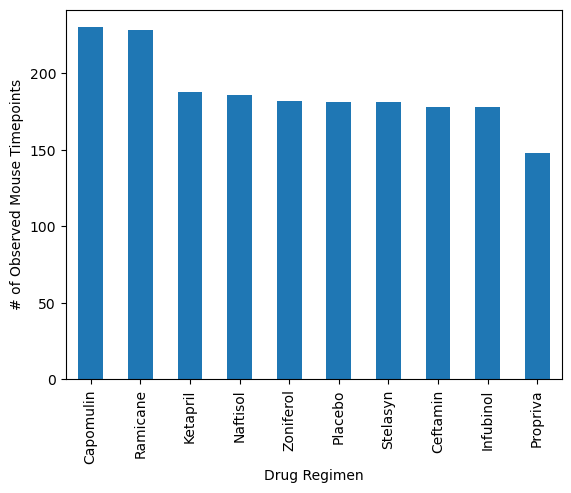

In [12]:
# generate bar chart using Pandas
pd_bar_mice_per_regimen = mice_per_regimen_count.plot(kind="bar")

pd_bar_mice_per_regimen.set_xlabel(barlabel_x)
pd_bar_mice_per_regimen.set_ylabel(barlabel_y)

plt.show()

plt.close()

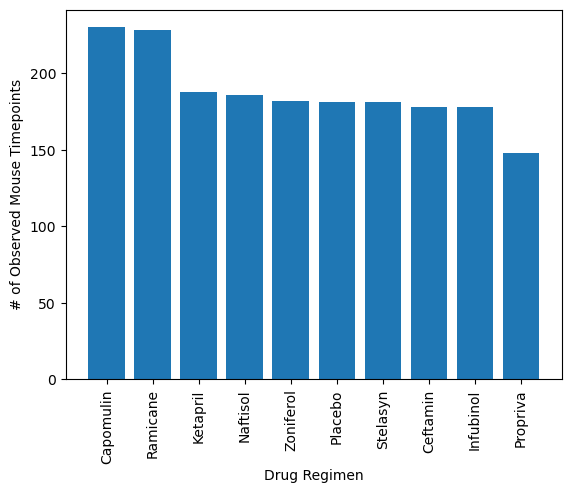

In [14]:
# generate bar chart using Matplotlib
mice_x_regimen = np.arange(len(mice_per_regimen_count))
regimen_name = list(mice_per_regimen_count.index.values)

mat_bar_mice_per_regimen = plt.bar(mice_x_regimen, mice_per_regimen_count)

plt.xticks(mice_x_regimen, regimen_name, rotation="vertical")
plt.xlabel(barlabel_x)
plt.ylabel(barlabel_y)

plt.show()

plt.close()

In [15]:
# create shared pie data
mice_sex = mice_analysis_data.groupby("Sex")["Sex"].count()
mice_sex

Sex
Female    922
Male      958
Name: Sex, dtype: int64

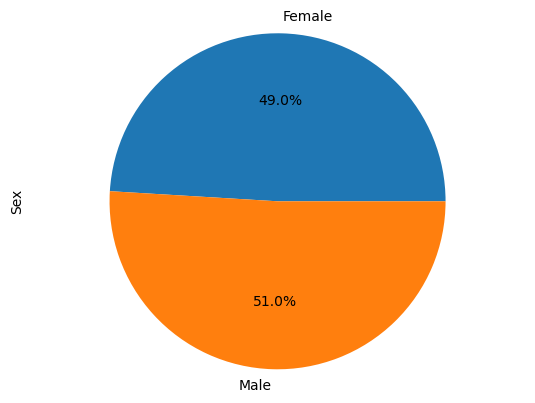

In [16]:
# generate pie chart using Pandas
pd_pie_mice_sex = mice_sex.plot(kind="pie", autopct="%1.1f%%")

plt.axis("equal")

pd_pie_mice_sex.set_ylabel("Sex")

plt.show()

plt.close()

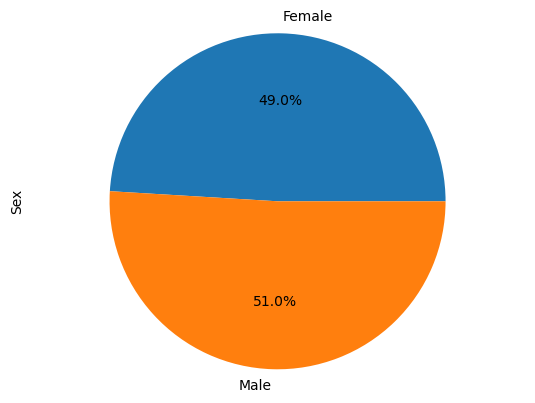

In [17]:
# generate pie chart using Matplotlib
mat_pie_mice_sex = plt.pie(mice_sex, autopct="%1.1f%%", labels=mice_sex.index)

plt.axis("equal")

plt.ylabel("Sex")

plt.show()

plt.close()

## Calculate Quartlies, Find Outliers, and Create a Box Plot

In [22]:
# create a grouped dataframe that shows the last timepoint for each mouse
tempdf = pd.DataFrame(mice_analysis_data.groupby("Mouse ID")["Timepoint"].last().sort_values())
last_tp = tempdf.reset_index().rename(columns={"Timepoint": "Last_Timepoint"})

merged_mice = pd.merge(mice_analysis_data, last_tp, on="Mouse ID")
merged_mice.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,Last_Timepoint
0,k403,Ramicane,Male,21,16,0,45.000000,0,45
1,k403,Ramicane,Male,21,16,5,38.825898,0,45
2,k403,Ramicane,Male,21,16,10,35.014271,1,45
3,k403,Ramicane,Male,21,16,15,34.223992,1,45
4,k403,Ramicane,Male,21,16,20,32.997729,1,45


In [23]:
# list of treatment names
treatment_names = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
tumor_vols = []

lbltumor = "Tumor Volume (mm3)"

for treatment in treatment_names:

    item = merged_mice.loc[merged_mice["Drug Regimen"] == treatment]

    item_vol = item.loc[item["Timepoint"] == item["Last_Timepoint"]]

    tumorvals = item_vol[lbltumor]
    tumor_vols.append(tumorvals)

    quarts = tumorvals.quantile([.25,.5,.75])
    upperquart = quarts[0.75]
    lowerquart = quarts[0.25]
    iqitem = upperquart - lowerquart
    print(f"IQR for {treatment}: {iqitem}")

    u_bound = upperquart + (1.5*iqitem)
    l_bound = lowerquart - (1.5*iqitem)
    print(f"    Upper bound: {u_bound}")
    print(f"    Lower bound: {l_bound}")

    outliers_num = (tumorvals.loc[(item_vol[lbltumor] >= u_bound) |
                                  (item_vol[lbltumor] <= l_bound)]).count()
    print(f"    Outliers: {outliers_num}")

IQR for Capomulin: 7.781863460000004
    Upper bound: 51.83201549
    Lower bound: 20.70456164999999
    Outliers: 0
IQR for Ramicane: 9.098536719999998
    Upper bound: 54.30681135
    Lower bound: 17.912664470000003
    Outliers: 0
IQR for Infubinol: 11.477135160000003
    Upper bound: 82.74144559000001
    Lower bound: 36.83290494999999
    Outliers: 1
IQR for Ceftamin: 15.577752179999997
    Upper bound: 87.66645829999999
    Lower bound: 25.355449580000002
    Outliers: 0


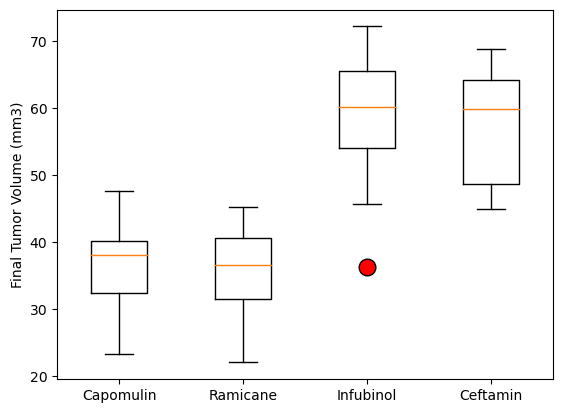

In [24]:
# generate box plot of tumor volume of each mouse
fig, pltTumor = plt.subplots()
pltTumor.boxplot(tumor_vols, labels=treatment_names,flierprops={"markerfacecolor":"r","markersize":12})

pltTumor.set_ylabel(f"Final {lbltumor}")

plt.show()

plt.close()

## Line and Scatter Plots

In [25]:
# select a mouse that was treated with Capomulin
treatment_name = "Capomulin"
mouseid = "u364"
mouse = mice_analysis_data.loc[mice_analysis_data["Mouse ID"] == mouseid]
treatment_df = mice_analysis_data.loc[mice_analysis_data["Drug Regimen"] == treatment_name]

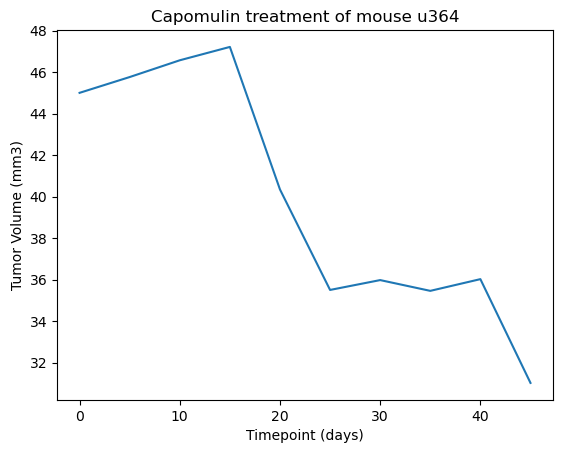

In [26]:
# generate a line plot
plt.plot(mouse["Timepoint"],mouse[lbltumor])

plt.title(f"{treatment_name} treatment of mouse {mouseid}")
plt.xlabel("Timepoint (days)")
plt.ylabel(lbltumor)

plt.show()

plt.close()

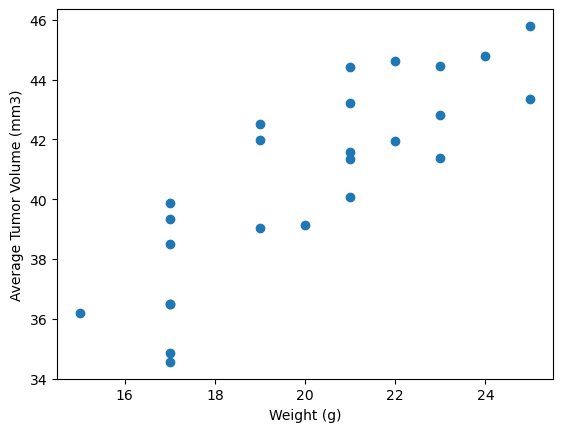

In [28]:
# generate a scatterplot
treatment_ave = treatment_df.groupby("Mouse ID")[["Weight (g)", lbltumor]].mean()

weight_ave = treatment_ave["Weight (g)"]
tumor_ave = treatment_ave[lbltumor]

plt.scatter(weight_ave, tumor_ave)
plt.xlabel("Weight (g)")
plt.ylabel(f"Average {lbltumor}")

plt.show()

plt.close()

## Correlation and Regression



The correlation between mouse weight and the average tumor volume is 0.84


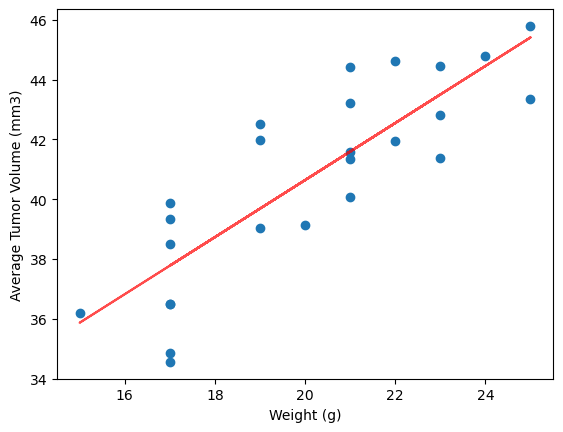

In [29]:
# plot the linear regression on top of previous scatter plot
val_x = weight_ave
val_y = tumor_ave

correlation = round(st.pearsonr(val_x, val_y)[0],2)
print(f"The correlation between mouse weight and the average tumor volume is {correlation}")

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(val_x, val_y)
regress_values = val_x * slope + intercept

plt.scatter(val_x,val_y)
plt.plot(val_x,regress_values, color='r', alpha=0.7)

plt.xlabel("Weight (g)")
plt.ylabel(f"Average {lbltumor}")

plt.show()

plt.close()